In [1]:
import json

import pandas as pd
import plotly.graph_objects as go


###################################


from datafin.apis import PolygonClient                     #type: ignore

from datafin.aws import SecretsClient                      #type: ignore
from datafin.aws import S3Client                           #type: ignore

from datafin.utils import GmailClient                      #type: ignore
from datafin.utils import (                                #type: ignore
    now,
    to_ny_time,
    string_formating,
    get_ny_timestamp_for_today_time_range,
    is_today_a_trading_day
)

In [ ]:
secrets = SecretsClient()

s3 = S3Client(
    aws_access_key_id = secrets.aws_access_key,
    aws_secret_access_key = secrets.aws_secret_access_key,
    bucket_name = secrets.get_bucket_name()
)

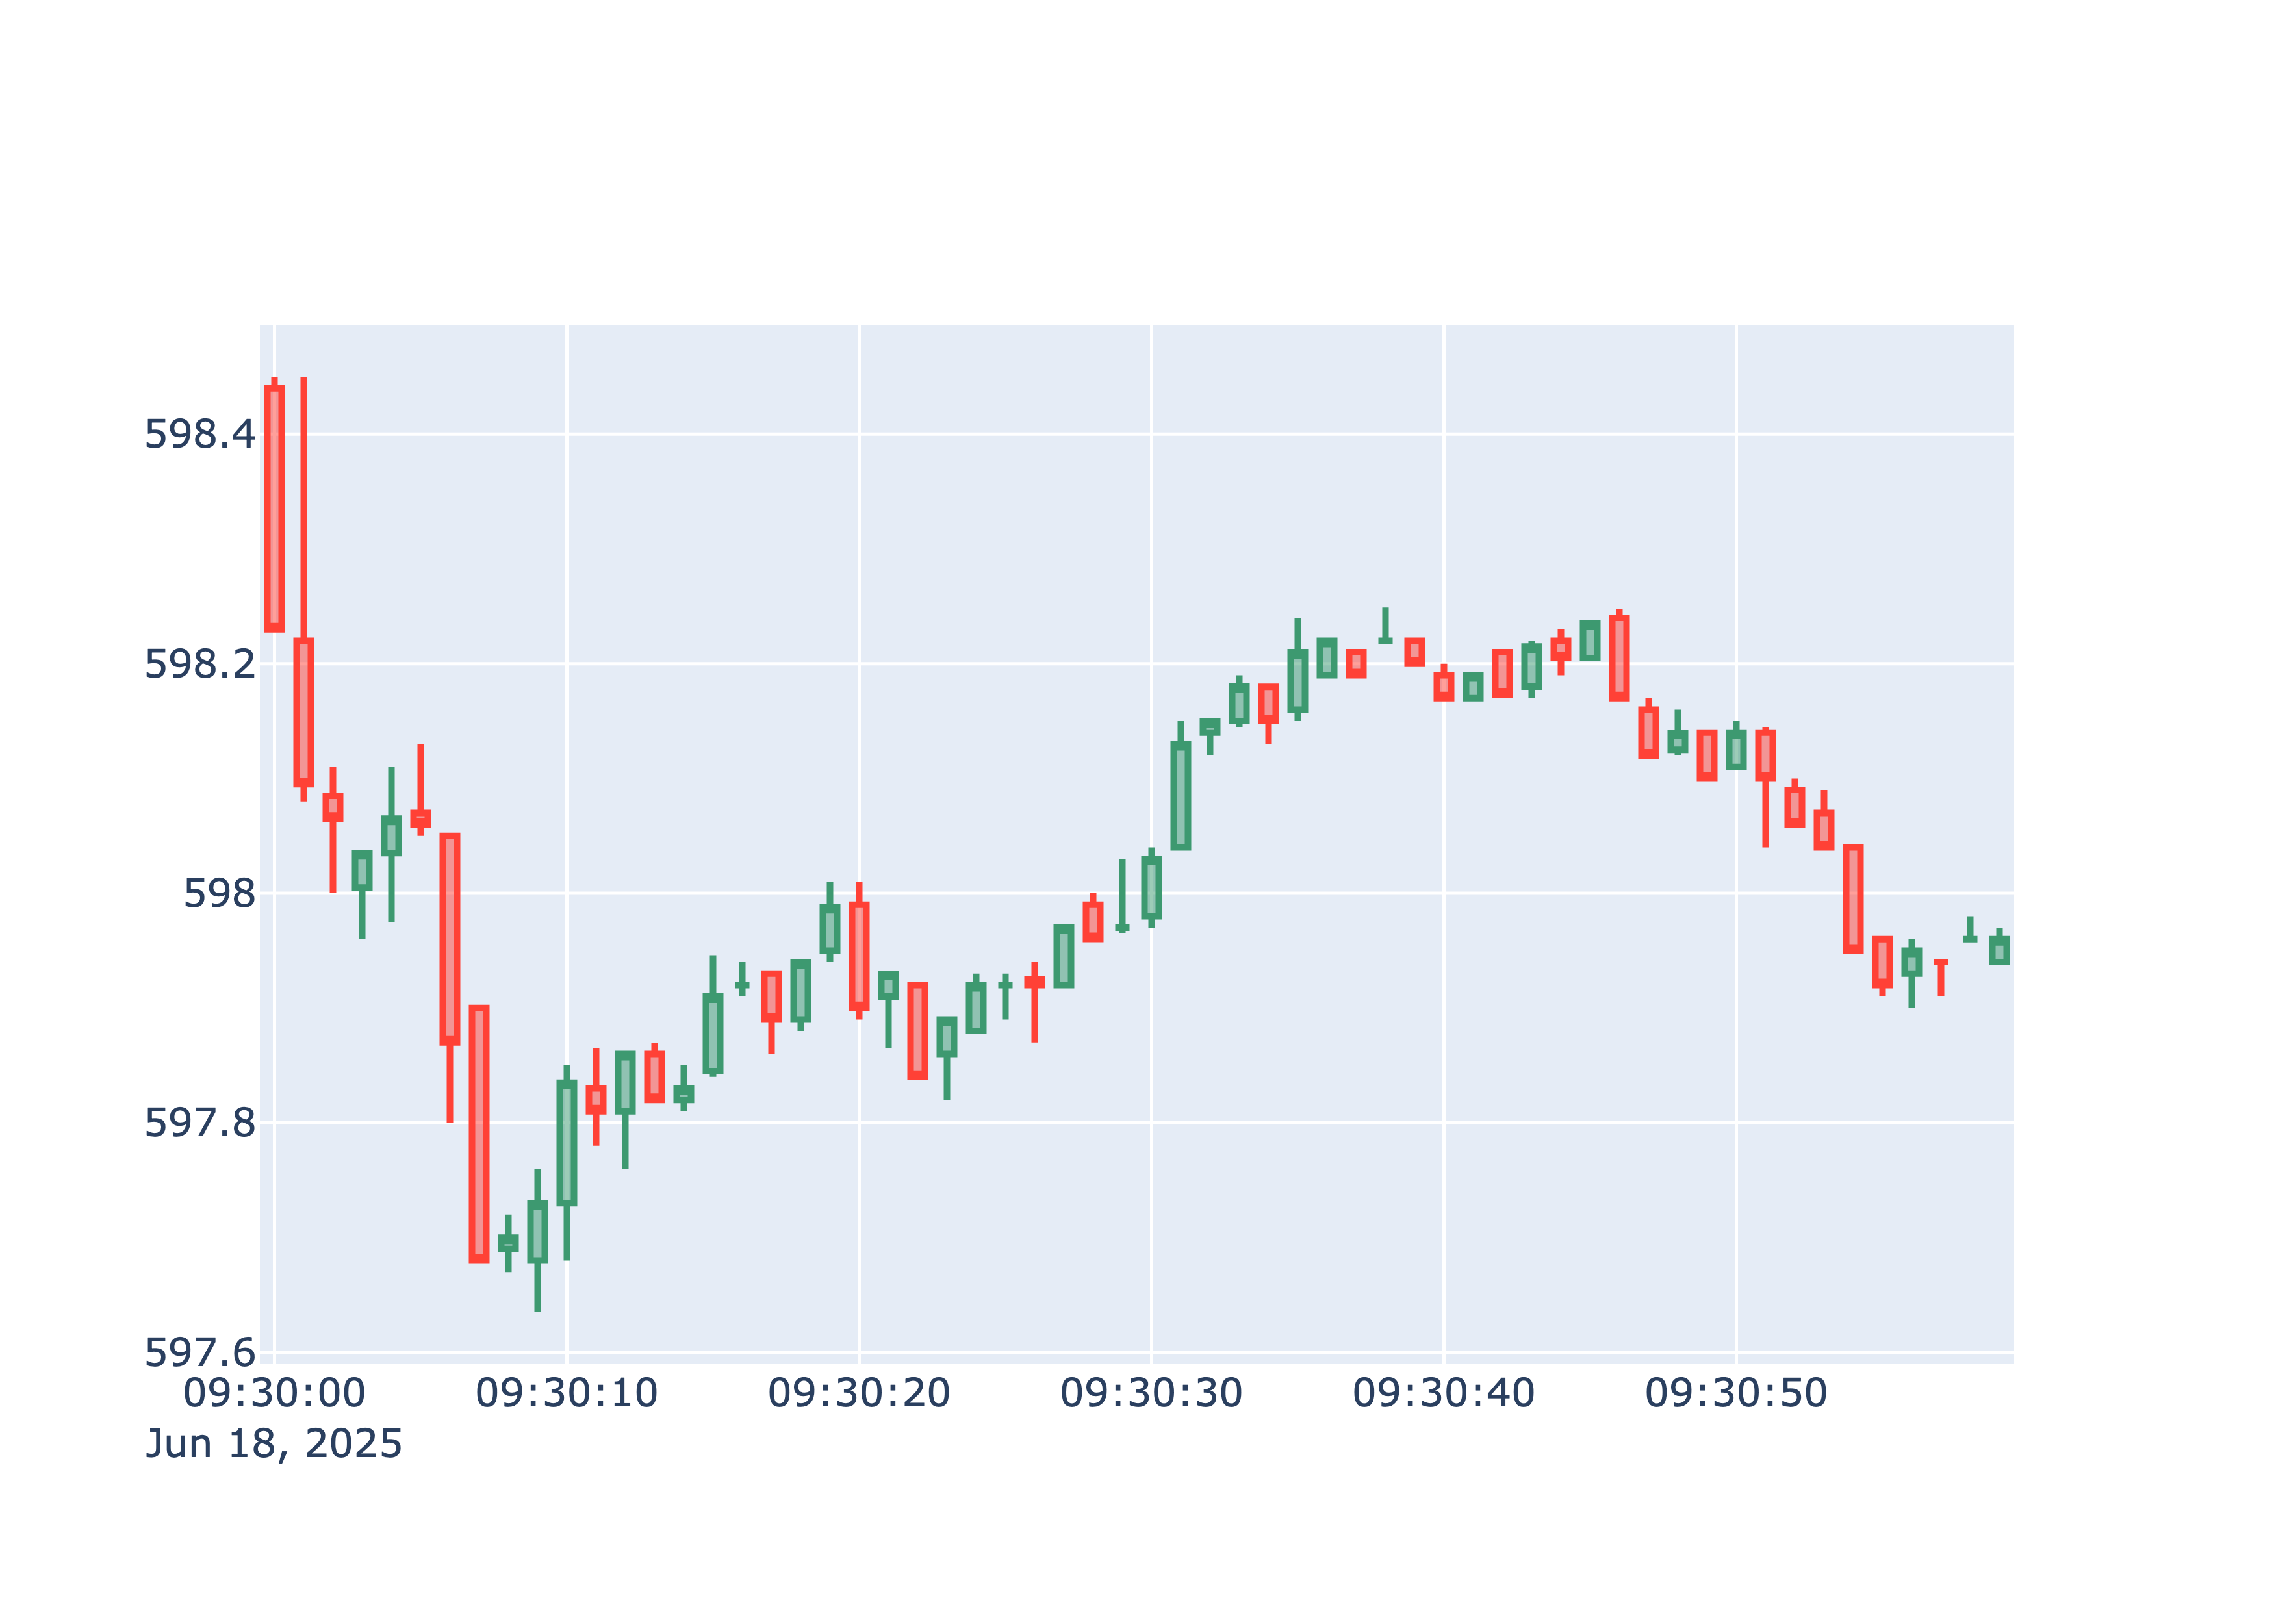

In [ ]:
import plotly.graph_objects as go
from IPython.display import Image, display

##########################

df = s3.get_parquet(
    path = 'v1/data/test',
    file_name = 'spy-open-chart-test'
)

fig = go.Figure(data=[
        go.Candlestick(
            x=df['datetime_ny'],
            open=df['open'],
            high=df['high'],
            low=df['low'],
            close=df['close']
        )
    ]
)

fig.update_layout(xaxis_rangeslider_visible=False)
    
image_bytes = fig.to_image(
    format="png",
    scale=5,
    engine="kaleido"
)

display(Image(image_bytes))

# s3.post_png(
#     image_bytes=image_bytes,
#     path="charts",
#     file_name="candlestick_chart_v1"
# )

# image_from_s3 = s3.get_png(
#     path = 'charts',
#     file_name = 'candlestick_chart_v1'
# )

# gmail.send_email(
#     to = secrets.get_gmail_send_to_address(),
#     subject = 'todays opening spy minute',
#     text = 'attached is an image of todays opening minute on spy',
#     png_bytes = image_from_s3,
#     png_filename = '06-16-opening-min'
# )
